In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the files
df_co2 = pd.read_csv('data/co2_emissions_tonnes_per_person.csv')
df_electricity = pd.read_csv('data/electricity_generation_total.csv')
df_gdp = pd.read_csv('data/gdp_total_yearly_growth.csv')
df_income = pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_oil = pd.read_csv('data/oil_consumption_total.csv')
df_population = pd.read_csv('data/population_growth_annual_percent.csv')

In [3]:
# unpivot the columns from the source
df_co2 = df_co2.melt(id_vars=['country'])
df_co2.columns = ['country', 'year', 'co2']

df_electricity = df_electricity.melt(id_vars=['country'])
df_electricity.columns = ['country', 'year', 'electricity']

df_gdp = df_gdp.melt(id_vars=['country'])
df_gdp.columns = ['country', 'year', 'gdp']

df_income = df_income.melt(id_vars=['country'])
df_income.columns = ['country', 'year', 'income']

df_oil = df_oil.melt(id_vars=['country'])
df_oil.columns = ['country', 'year', 'oil']

df_population = df_population.melt(id_vars=['country'])
df_population.columns = ['country', 'year', 'population']

In [4]:
# sizes
print('CO2 years: {}'.format(len(df_co2.year.unique())))
print('Electricity years: {}'.format(len(df_electricity.year.unique())))
print('GDP years: {}'.format(len(df_gdp.year.unique())))
print('Income years: {}'.format(len(df_income.year.unique())))
print('Oil years: {}'.format(len(df_oil.year.unique())))
print('Population years: {}'.format(len(df_population.year.unique())))

CO2 years: 215
Electricity years: 32
GDP years: 213
Income years: 241
Oil years: 52
Population years: 58


In [5]:
# sizes
print('CO2 countries: {}'.format(len(df_co2.country.unique())))
print('Electricity countries: {}'.format(len(df_electricity.country.unique())))
print('GDP countries: {}'.format(len(df_gdp.country.unique())))
print('Income countries: {}'.format(len(df_income.country.unique())))
print('Oil countries: {}'.format(len(df_oil.country.unique())))
print('Population countries: {}'.format(len(df_population.country.unique())))

CO2 countries: 192
Electricity countries: 65
GDP countries: 194
Income countries: 193
Oil countries: 65
Population countries: 194


In [6]:
# create an "empty" data frame for the unique combination of year and country 
year = np.unique(np.concatenate([df_co2.year.unique() , df_electricity.year.unique(), df_gdp.year.unique(), df_income.year.unique(), df_oil.year.unique(), df_population.year.unique()]))
country = np.unique(np.concatenate([df_co2.country.unique() , df_electricity.country.unique(), df_gdp.country.unique(), df_income.country.unique(), df_oil.country.unique(), df_population.country.unique()]))

col_year = []
col_country = []
for y in year:
    for c in country:
        col_year.append(y)
        col_country.append(c)
        
df = pd.DataFrame({'year': col_year, 'country': col_country})

In [7]:
# create a single data frame
df = pd.merge(left = df, right = df_co2, how = 'left', on = ['year', 'country'])
df = pd.merge(left = df, right = df_electricity, how = 'left', on = ['year', 'country'])
df = pd.merge(left = df, right = df_gdp, how = 'left', on = ['year', 'country'])
df = pd.merge(left = df, right = df_income, how = 'left', on = ['year', 'country'])
df = pd.merge(left = df, right = df_oil, how = 'left', on = ['year', 'country'])
df = pd.merge(left = df, right = df_population, how = 'left', on = ['year', 'country'])

In [8]:
# investigate the correlation between co2 and electricity
df[(~df.co2.isnull())&(~df.electricity.isnull())][['co2', 'electricity']].corr()

,co2,electricity
co2,1.000000,0.114495
electricity,0.114495,1.000000


In [9]:
# investigate the correlation between co2 and gdp
df[(~df.co2.isnull())&(~df.gdp.isnull())][['co2', 'gdp']].corr()

,co2,gdp
co2,1.000000,0.096194
gdp,0.096194,1.000000


In [10]:
# investigate the correlation between co2 and income
df[(~df.co2.isnull())&(~df.income.isnull())][['co2', 'income']].corr()

,co2,income
co2,1.000000,0.709263
income,0.709263,1.000000


In [11]:
# investigate the correlation between co2 and oil consumption
df[(~df.co2.isnull())&(~df.oil.isnull())][['co2', 'oil']].corr()

,co2,oil
co2,1.000000,0.127614
oil,0.127614,1.000000


In [12]:
# investigate the correlation between co2 and population
df[(~df.co2.isnull())&(~df.population.isnull())][['co2', 'population']].corr()

,co2,population
co2,1.000000,0.154608
population,0.154608,1.000000


In [13]:
# crete a dataframe just with the income and co2
df_corr = df[(~df.co2.isnull())&(~df.income.isnull())][['co2', 'income']]

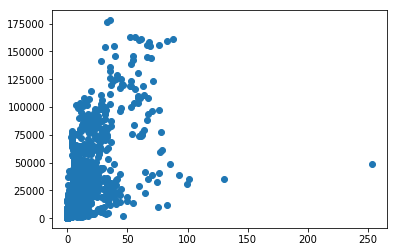

In [14]:
# visually assess the correlation
plt.scatter(df_corr['co2'], df_corr['income'])
plt.show()

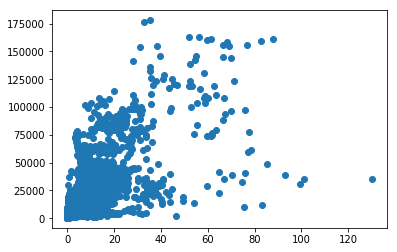

In [15]:
# same plot without the outlier
df_corr = df_corr[df_corr.co2 < 200]
plt.scatter(df_corr['co2'], df_corr['income'])
plt.show()